<a href="https://colab.research.google.com/github/KoreTane/PredictiveLeadManagement/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#!pip install xlsxwriter
#!pip install fuzzywuzzy
#!pip install tabula-py

In [43]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import matplotlib.dates as mdates  # Biblioteca para formatação de datas
import matplotlib.widgets as widgets  # Biblioteca para criação de widgets
from ipywidgets import widgets  # Biblioteca para criação de widgets
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
from fuzzywuzzy import fuzz  # Biblioteca para fuzzy matching
from fuzzywuzzy import process  # Funções para fuzzy matching
import tabula  # Biblioteca para extração de dados de arquivos PDF
import warnings  # Gerenciamento de warnings
warnings.filterwarnings('ignore')

In [44]:
dfc = pd.read_excel('CrmAgendaClientes.xlsx')

In [45]:
# Definir tema global para os gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.6,
    rc={
        'figure.figsize': (12,8)
    }
)

In [46]:
# Listar os atributos e funções de um objeto, excluindo os que começam com _
def list_attributes(obj):
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

<h1><font size="5" color="#FF69B4">Análise dos dados</font></h1>

<p><font size="4">Durante a EDA, utilizamos gráficos e visualizações para revelar padrões e tendências ocultas nos dados. Além disso, exploramos relações entre variáveis, identificando correlações úteis para a construção de modelos preditivos.</font></p>

In [47]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NÃO AGENDOU,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NÃO AGENDOU,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,NÃO AGENDOU,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,NÃO AGENDOU,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,BALLET CLÁSSICO,NÃO AGENDOU,NOITE,NÃO INFORMADO,NÃO,DESISTIU


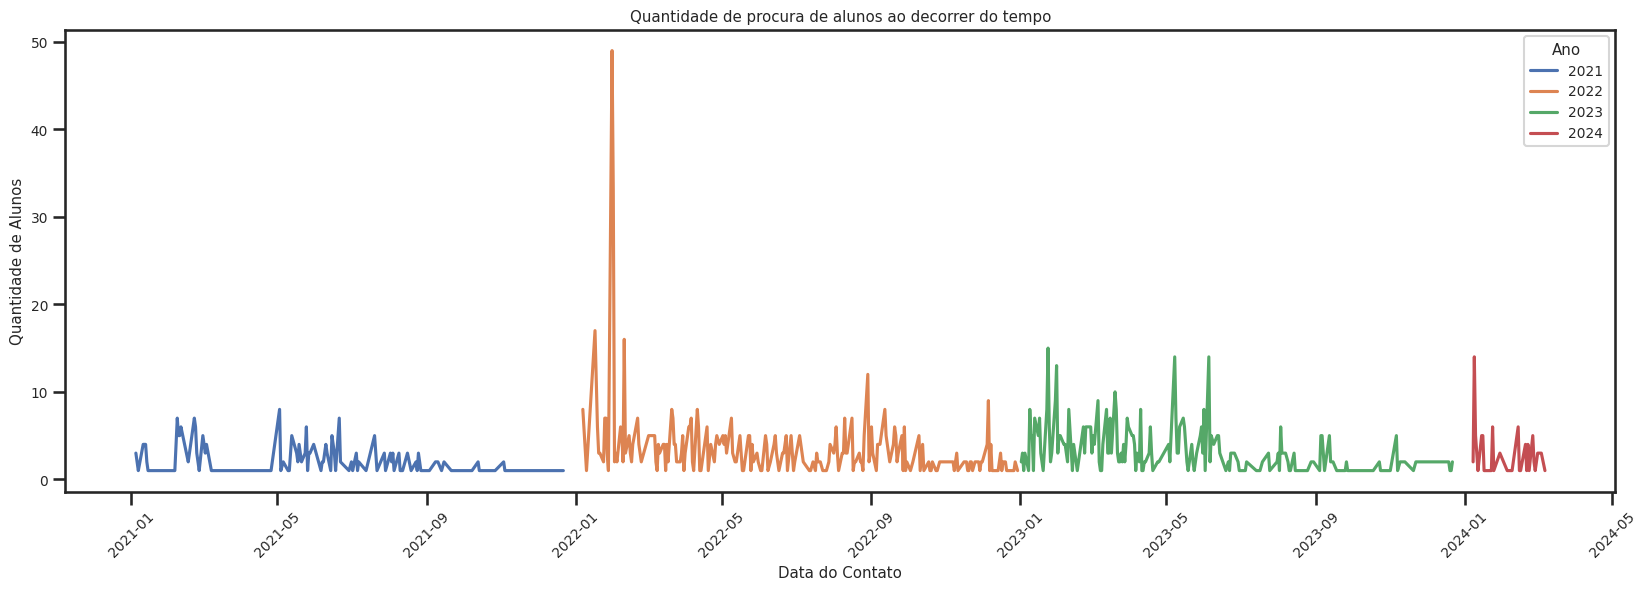

Button(description='Filtrar por Ano', style=ButtonStyle())

Dropdown(options=(('2021', '2021'), ('2022', '2022'), ('2023', '2023'), ('2024', '2024')), value='2021')

Ano selecionado: 2021
Filtrando por ano 2021


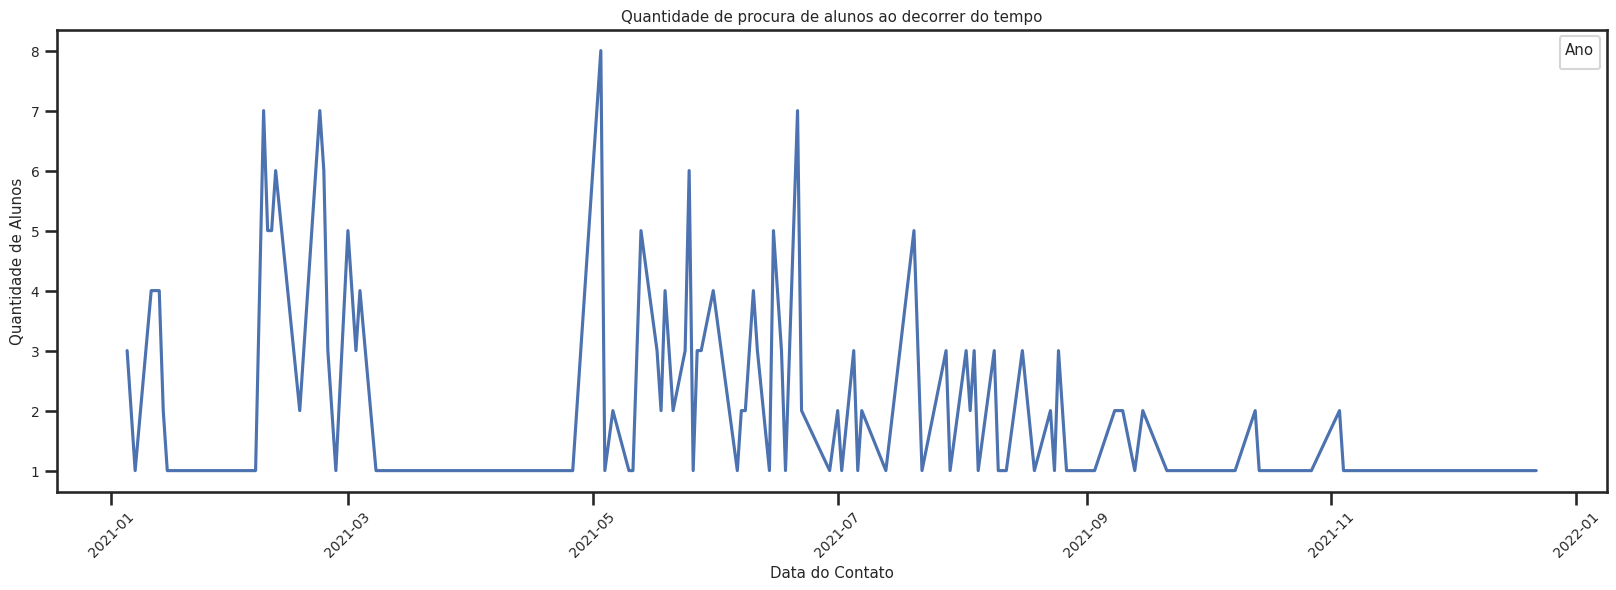

In [95]:
# Converta a coluna 'DATA 1º CONTATO' para datetime
dfc['DATA 1º CONTATO'] = pd.to_datetime(dfc['DATA 1º CONTATO'])

# Agrupar os dados por data e contagem de alunos
dfc_grouped = dfc.groupby('DATA 1º CONTATO')['ESTILOS'].count().reset_index()

# Renomear as colunas
dfc_grouped.columns = ['DATA 1º CONTATO', 'QUANTIDADE DE ALUNOS']

# Ordenar o DataFrame pelo 'DATA 1º CONTATO'
dfc_grouped = dfc_grouped.sort_values('DATA 1º CONTATO')

# Criar uma coluna de ano
dfc_grouped['ANO'] = dfc_grouped['DATA 1º CONTATO'].dt.year

# Plotar o gráfico de linha
plt.figure(figsize=(20, 6))

# Plotar linhas separadas para cada ano
for ano in dfc_grouped['ANO'].unique():
    dfc_grouped_ano = dfc_grouped[dfc_grouped['ANO'] == ano]
    sns.lineplot(x='DATA 1º CONTATO', y='QUANTIDADE DE ALUNOS', data=dfc_grouped_ano, label=str(ano))

# Adicione título e rótulos
plt.title('Quantidade de procura de alunos ao decorrer do tempo')
plt.xlabel('Data do Contato')
plt.ylabel('Quantidade de Alunos')
plt.legend(title='Ano')

# Ajustar o eixo x para exibir as datas corretamente
plt.xticks(rotation=45)

# Criar um dropdown menu com os anos
years = dfc_grouped['ANO'].unique()
year_choice = widgets.Dropdown(options=[(str(year), str(year)) for year in years])
plt.show()

# Definir uma função para filtrar os dados com base na escolha do usuário
def filter_data(value):
    selected_year = int(value)
    filtered_data = dfc_grouped[dfc_grouped['ANO'] == selected_year]
    plt.cla()
    sns.lineplot(x='DATA 1º CONTATO', y='QUANTIDADE DE ALUNOS', data=filtered_data)
    plt.title('Quantidade de procura de alunos ao decorrer do tempo')
    plt.xlabel('Data do Contato')
    plt.ylabel('Quantidade de Alunos')
    plt.legend(title='Ano')
    plt.xticks(rotation=45)
    plt.figure(figsize=(20, 6))  # Tamanho 20,6
    plt.show()

# Criar um botão para filtrar os dados
button = widgets.Button(description='Filtrar por Ano')
display(button)

years = dfc_grouped['ANO'].unique()
year_choice = widgets.Dropdown(options=[(str(year), str(year)) for year in years])

def on_button_clicked(b):
    print(f"Ano selecionado: {year_choice.value}")
    filter_data(year_choice.value)

button.on_click(on_button_clicked)

# Mostrar o dropdown menu
display(year_choice)

def filter_data(value):
    print(f"Filtrando por ano {value}")
    selected_year = int(value)
    filtered_data = dfc_grouped[dfc_grouped['ANO'] == selected_year]
    plt.figure(figsize=(20, 6))  # Definir o tamanho do gráfico
    plt.cla()  # Limpar o gráfico anterior
    sns.lineplot(x='DATA 1º CONTATO', y='QUANTIDADE DE ALUNOS', data=filtered_data)
    plt.title('Quantidade de procura de alunos ao decorrer do tempo')
    plt.xlabel('Data do Contato')
    plt.ylabel('Quantidade de Alunos')
    plt.legend(title='Ano')
    plt.xticks(rotation=45)
    plt.show()  # Mostrar o gráfico filtrado

<Figure size 1000x600 with 0 Axes>

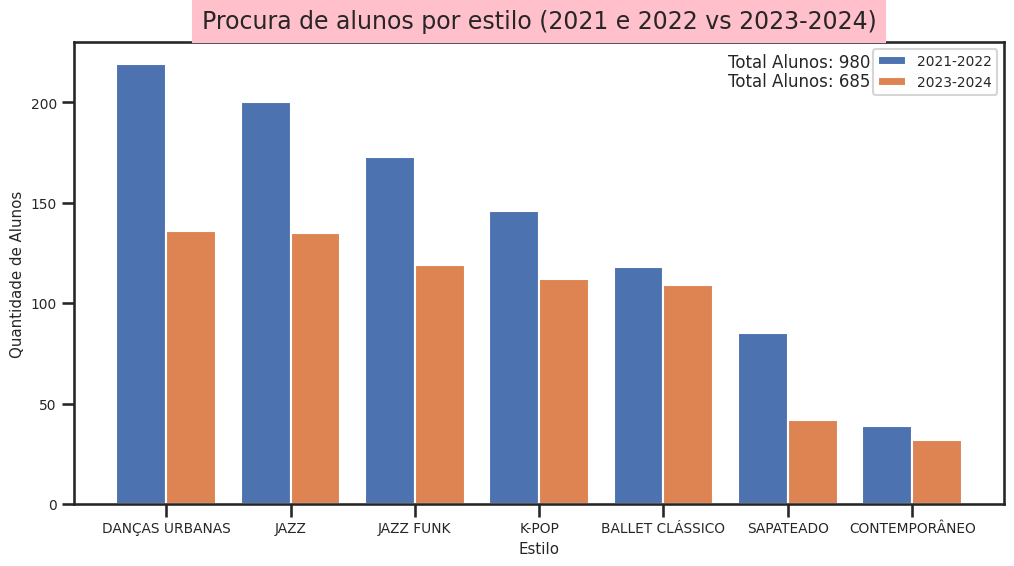

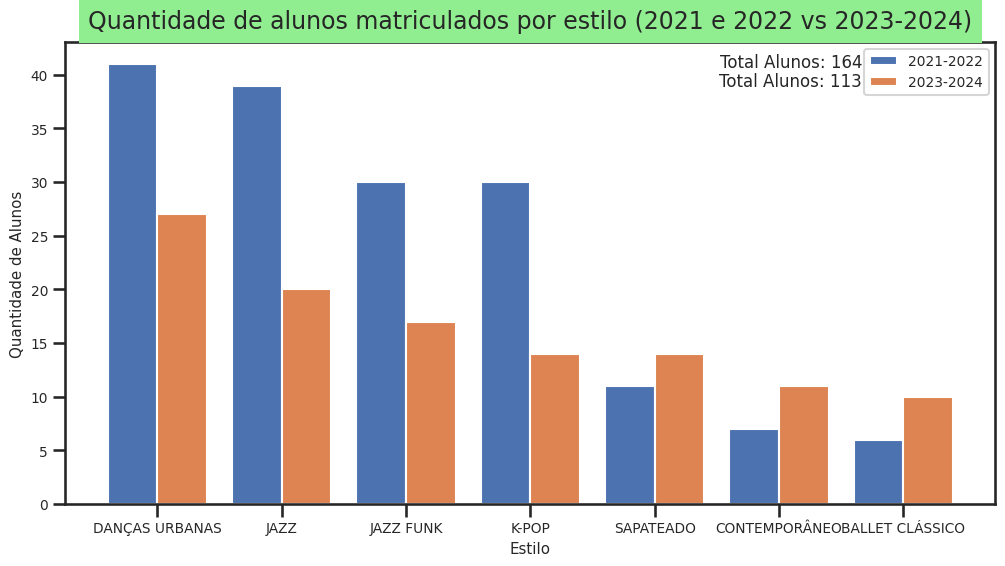

In [49]:
# Contar a quantidade de alunos por estilo e Generero
style_counts1 = dfc['ESTILOS'].value_counts()
style_counts2 = dfc['GENERO'].value_counts()
# Filtrar apenas os registros com anos de 2023 e 2024
filtered_dfCr = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2023, 2024]))]
# Filtrar apenas os registros com anos de 2021 e 2022
filtered_dfCAr = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2021, 2022]))]
# Filtrar apenas os registros com anos de 2023 e 2024 e situação final 'MATRICULADO'
filtered_dfC = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2023, 2024])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]
# Filtrar apenas os registros com anos de 2021 e 2022 e situação final 'MATRICULADO'
filtered_dfCA = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2021, 2022])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]
# Contar a quantidade de alunos por estilo para 2023 e 2024
style_counts = filtered_dfC['ESTILOS'].value_counts()
# Contar a quantidade de alunos por estilo para 2021 e 2022
style_counts_2021_2022 = filtered_dfCA['ESTILOS'].value_counts()
# Contar a quantidade de alunos por estilo para 2023 e 2024
style_countsr = filtered_dfCr['ESTILOS'].value_counts()
# Contar a quantidade de alunos por estilo para 2021 e 2022
style_counts_2021_2022r = filtered_dfCAr['ESTILOS'].value_counts()

# Plotar o gráfico de barras qtd. alundos x estilos
plt.figure(figsize=(10, 6))

style_counts_2021_2022r = style_counts_2021_2022r
style_counts_2023_2024r = style_countsr
x = np.arange(len(style_counts_2021_2022r))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, style_counts_2021_2022r, width, label='2021-2022')
ax.bar(x + width/2, style_counts_2023_2024r, width, label='2023-2024')

ax.set_xticks(x)
ax.set_xticklabels(style_counts_2021_2022r.index)
ax.set_xlabel('Estilo')
ax.set_ylabel('Quantidade de Alunos')
ax.set_title('Procura de alunos por estilo (2021 e 2022 vs 2023-2024)',
           backgroundcolor='#FFC0CB',
           pad=10,
           fontsize=17)
ax.legend()
# Adicionar o Total Alunos ao lado da legenda
ax.text(0.78, 0.975, f'Total Alunos: {len(filtered_dfCAr)}', transform=ax.transAxes, ha='center', va='top', fontsize=12)
ax.text(0.78, 0.935, f'Total Alunos: {len(filtered_dfCr)}', transform=ax.transAxes, ha='center', va='top', fontsize=12)
plt.show()
print('')
style_counts_2021_2022 = style_counts_2021_2022
style_counts_2023_2024 = style_counts
x = np.arange(len(style_counts_2021_2022))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, style_counts_2021_2022, width, label='2021-2022')
ax.bar(x + width/2, style_counts_2023_2024, width, label='2023-2024')

ax.set_xticks(x)
ax.set_xticklabels(style_counts_2021_2022.index)
ax.set_xlabel('Estilo')
ax.set_ylabel('Quantidade de Alunos')
ax.set_title('Quantidade de alunos matriculados por estilo (2021 e 2022 vs 2023-2024)',
           backgroundcolor='lightgreen',
           pad=10,
           fontsize=17)
ax.legend()
# Adicionar o Total Alunos ao lado da legenda
ax.text(0.78, 0.975, f'Total Alunos: {len(filtered_dfCA)}', transform=ax.transAxes, ha='center', va='top', fontsize=12)
ax.text(0.78, 0.935, f'Total Alunos: {len(filtered_dfC)}', transform=ax.transAxes, ha='center', va='top', fontsize=12)
plt.show()

In [50]:
# Criar uma tabela de contingência entre as variáveis
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])

In [51]:
# Calcular o valor de Cramer's V (Medida de correlação entre FAIXA ETARIA e ESTILOS, onde 0 é nenhuma correlação e 1 é correlação perfeita)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_v = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

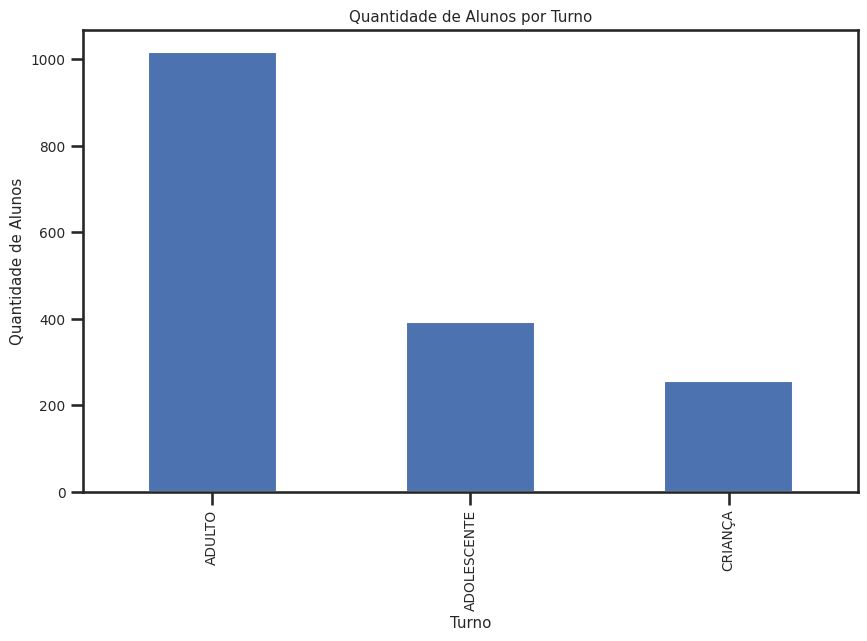

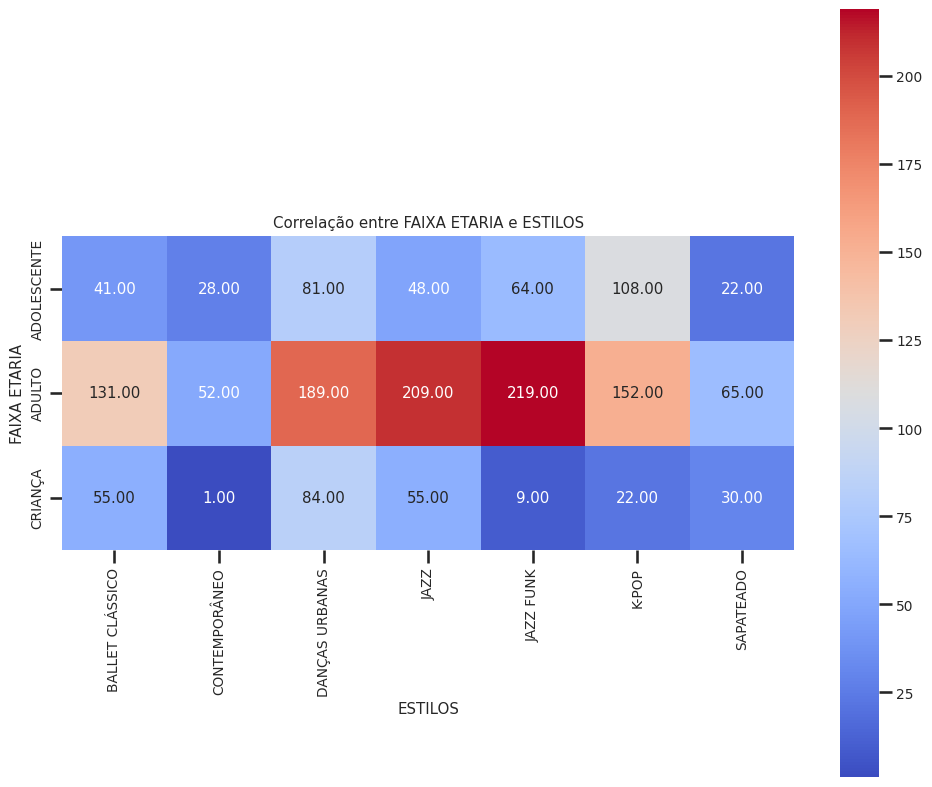

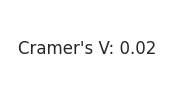

In [52]:
style_countsF = dfc['FAIXA ETARIA'].value_counts()
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])
plt.figure(figsize=(10, 6))
style_countsF.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
print('')
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre FAIXA ETARIA e ESTILOS')
plt.tight_layout()
plt.show()
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_v:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variávei faixa etaria e estilos

In [53]:
contingency_tableT = pd.crosstab(dfc['TURNO'], dfc['ESTILOS'])

In [54]:
# Calcular o valor de Cramer's V (Medida de correlação entre TURNO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vT = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

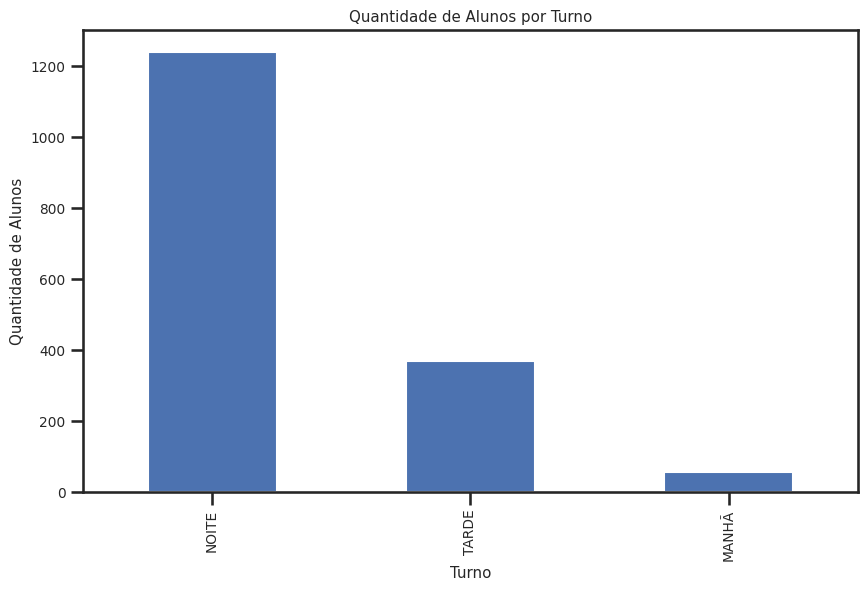

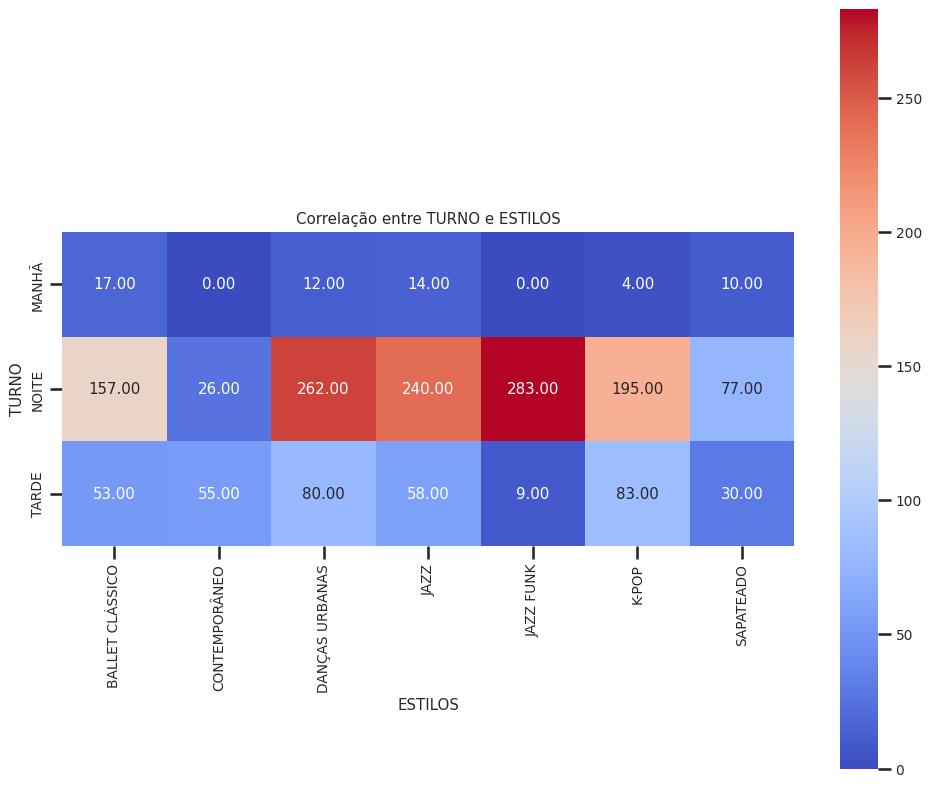

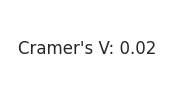

In [55]:
style_countsT = dfc['TURNO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
print('')
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tableT, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre TURNO e ESTILOS')
plt.tight_layout()
plt.show()
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [56]:
contingency_tableG = pd.crosstab(dfc['GENERO'], dfc['ESTILOS'])

In [57]:
# Calcular o valor de Cramer's V (Medida de correlação entre GENERO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vG = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

<Figure size 1000x800 with 0 Axes>

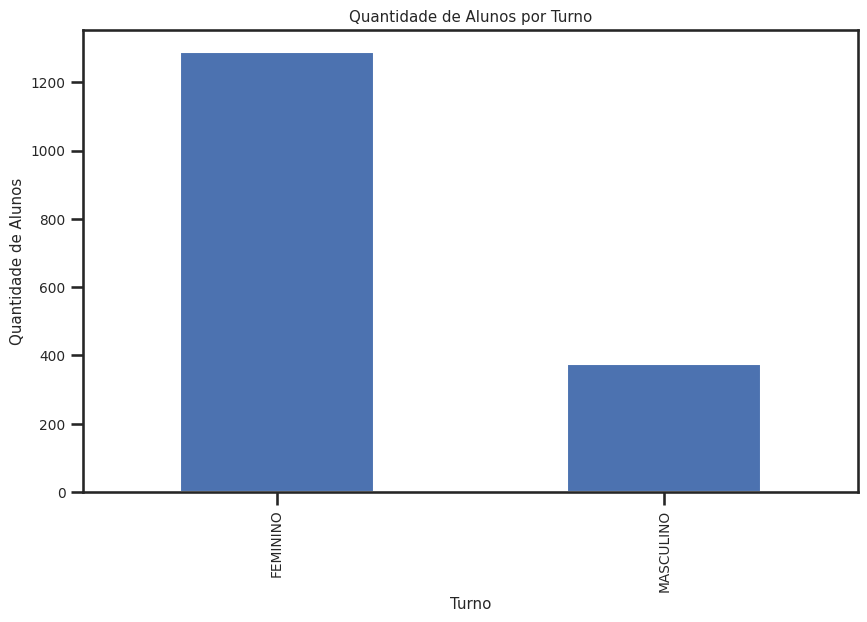

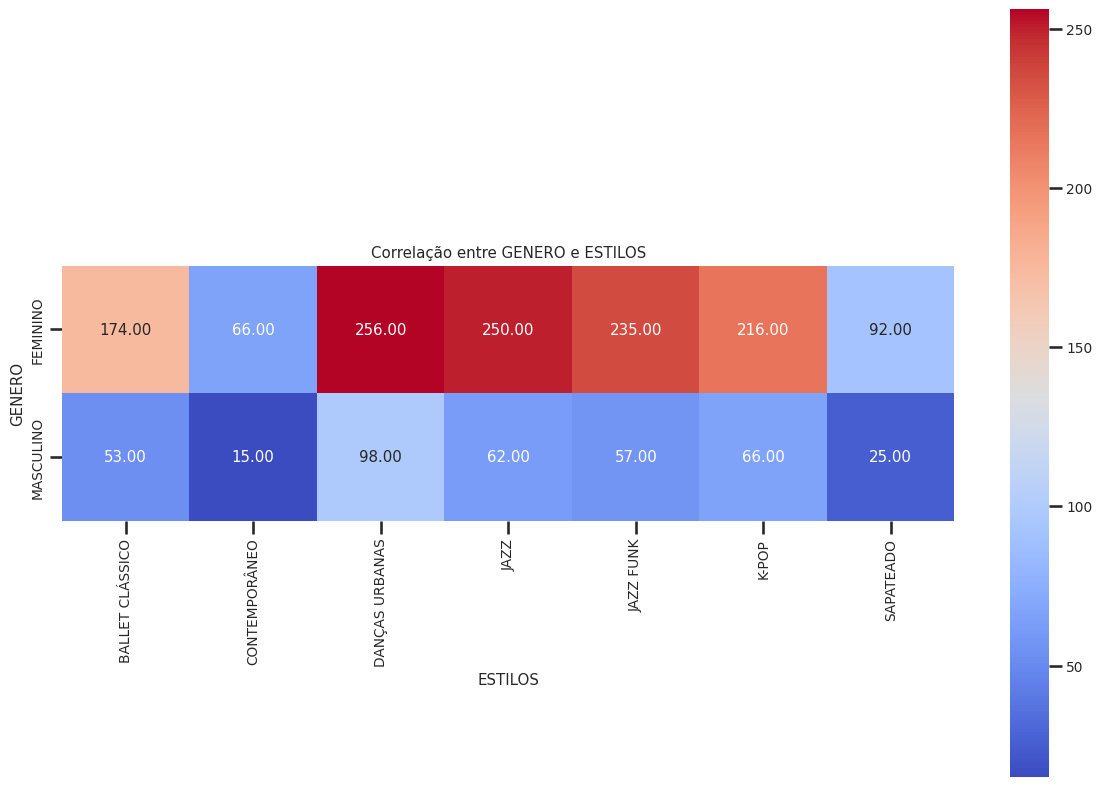

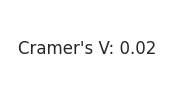

In [58]:
plt.figure(figsize=(10, 8))
style_countsG = dfc['GENERO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsG.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
print('')
sns.heatmap(contingency_tableG, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre GENERO e ESTILOS')
plt.tight_layout()
plt.show()
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [59]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NÃO AGENDOU,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NÃO AGENDOU,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,NÃO AGENDOU,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,NÃO AGENDOU,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,BALLET CLÁSSICO,NÃO AGENDOU,NOITE,NÃO INFORMADO,NÃO,DESISTIU


In [60]:
dfc['IDADE'].value_counts()

IDADE
19    571
14     65
15     64
13     61
16     56
     ... 
58      1
69      1
75      1
68      1
55      1
Name: count, Length: 63, dtype: int64

In [61]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1665 non-null   datetime64[ns]
 1   TRIMESTRE         1665 non-null   int64         
 2   NOME COMPLETO     1663 non-null   object        
 3   IDADE             1665 non-null   int64         
 4   FAIXA ETARIA      1665 non-null   object        
 5   GENERO            1665 non-null   object        
 6   TELEFONE          1665 non-null   object        
 7   TIPO CONTATO      1665 non-null   object        
 8   VIA               1665 non-null   object        
 9   ESTILOS           1665 non-null   object        
 10  DATA AGENDAMENTO  1665 non-null   object        
 11  TURNO             1665 non-null   object        
 12  PROFESSOR         1665 non-null   object        
 13  COMPARECEU        1665 non-null   object        
 14  SITUAÇÃO_FINAL    1665 n

<h1><font size="5" color="#FF69B4">Base Matricula CEP</font></h1>

<p><font size="4"> Essa base contém a matricula, nome completo do aluno e cep. Servirá para identificarmos os usuários ativos hoje que estão no leed de alunos e também o cep para geolocalização do dashboard no Power BI.</font></p>

In [62]:
dfm =pd.read_excel('MatriculaCEP.xlsx')

In [63]:
dfm

,Matrícula,Nome,CEP
0,23001,Clara Yumi Shiraishi,12242-431
1,23002,Luisa Mendes Hypolito Neves Pires,12243-710
2,23003,Sofia Mendes Hypolito Neves Pires,12243-710
3,23008,Maria Eduarda Guedes Santos,12231-070
4,23009,Maria Clara Coelho,12242-410
...,...,...,...
86,24030,Henrique Fernandes Veloso,12243-630
87,24031,Priscilla Pereira Figueiredo,12233-002
88,24032,Rafaela Luchi Marques Penteado,12237-410
89,24033,Leticia Akemi Kague,12246-021


In [64]:
# Deixe a coluna "Nome" em caixa alta
dfm['Nome'] = dfm['Nome'].str.upper()

In [65]:
nomes_comuns = dfm['Nome'][dfm['Nome'].isin(dfc['NOME COMPLETO'])]
nomes_comuns

31         GIOVANNA PEREIRA FLORES
40         MEIRE NAKAMURA YAMAMOTO
45      MARIA RITA BARROS MEDEIROS
53      BENJAMIN PONTE DE OLIVEIRA
55                JOYCE CRUZ PONTE
57        CLARA KRUSCHEWSKY FRANCO
58     MYLENA RODRIGUES GOMES ARÃO
59    ISABELLY CRISTINA REIS SILVA
63             CLARA ARRUDA COELHO
72     ISABELLA IRIE TEIXEIRA REIS
80          ANA CLARA MELO JARONES
Name: Nome, dtype: object

In [66]:
nomes_parecidos = []
for nome in dfm['Nome']:
    for outro_nome in dfc['NOME COMPLETO']:
        if isinstance(nome, float) or isinstance(outro_nome, float):
            continue
        if fuzz.ratio(str(nome), str(outro_nome)) > 80:  # ajuste o valor de threshold aqui
            nomes_parecidos.append((nome, outro_nome))
nomes_parecidos

[('SOFIA MENDES HYPOLITO NEVES PIRES',
  'SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA'),
 ('FERNANDA SAYURI YKEDA', 'FERNANDA SAYURI'),
 ('BEATRIZ SCHIMIDT BARONI', 'BEATRIZ SCHIMIDT BARONI JÁ É ALUNA'),
 ('ANA CLARA RAMOS CASIMIRO', 'ANA CLARA RAMOS CASEMIRO'),
 ('GIOVANNA PEREIRA FLORES', 'GIOVANNA PEREIRA FLORES'),
 ('VANESSA DE ALMEIDA VITÓRIA', 'VANESSA DE ALMEIDA VITORIA'),
 ('THALITA DIAS FERREIRA', 'TALITHA MORAES FERREIRA'),
 ('MEIRE NAKAMURA YAMAMOTO', 'MEIRE NAKAMURA YAMAMOTO'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MANUELA NASCIMENTO DE ARAÚJO', 'MANUELA NASCIMENTO MÃE RENATA'),
 ('ELIS HELENA CRUZ PUNTO DE OLIVEIRA', 'ELIS HELENA CRUZ PONTE DE OLIVEIRA'),
 ('BENJAMIN PONTE DE OLIVEIRA', 'BENJAMIN PONTE DE OLIVEIRA'),
 ('JOYCE CRUZ PONTE', 'JOYCE CRUZ PONTE'),
 ('CLARA KRUSCHEWSKY FRANCO', 'CLARA KRUSCHEWSKY FRANCO'),
 ('

In [67]:
nomes_parecidos = pd.Series(nomes_parecidos)
nomes_parecidos.value_counts()

(ALINE DE FÁTIMA DE CARVALHO VIEIRA, ALINE DE FATIMA DE CARVALHO VIEIRA)             4
(ISABELLA IRIE TEIXEIRA REIS, ISABELLA IRIE TEIXEIRA REIS)                           3
(MARIA RITA BARROS MEDEIROS, MARIA RITA BARROS MEDEIROS)                             3
(CLARA ARRUDA COELHO, CLARA ARRUDA COELHO)                                           2
(AMANDA VENEGAS DOS ANJOS, AMANDA VENEGAS DOS ANJOS CASSIANA)                        2
(SOFIA MENDES HYPOLITO NEVES PIRES, SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA)    1
(JOYCE CRUZ PONTE, JOYCE CRUZ PONTE)                                                 1
(YASMIN CHU ALVES DA SILVA, YASMIN CHU ALVES DA SILVA MÃE CHU)                       1
(MARIA EDUARDA DA ROSA VIEIRA, MARIA EDUARDA DA ROSA)                                1
(ISABELLY CRISTINA REIS SILVA, ISABELLY CRISTINA REIS SILVA)                         1
(MYLENA RODRIGUES GOMES ARÃO, MYLENA RODRIGUES GOMES ARÃO)                           1
(CLARA KRUSCHEWSKY FRANCO, CLARA KRUSCHEWSK

<h1><font size="5" color="#FF69B4">DF2 ML</font></h1>

<p><font size="4">A base com a diferença de dias do primeiro contato e o agendamento para aula experimental. Aqui vamos verificar também se existe influência na firença de dias entre o primeiro contato e o agendamento para a conversão em matrícula. </font></p>

In [68]:
dfc2 = dfc

# Substituir valores inválidos por nulo
dfc2['DATA 1º CONTATO'].replace('Não agendou', pd.NA, inplace=True)
dfc2['DATA AGENDAMENTO'].replace('Não agendou', pd.NA, inplace=True)

# Criar uma coluna com a diferença em dias entre as datas
dfc2['DIFERENCA_DIAS'] = (pd.to_datetime(dfc2['DATA AGENDAMENTO'], errors='coerce') - pd.to_datetime(dfc2['DATA 1º CONTATO'], errors='coerce')).dt.days

In [69]:
dfc2.count()

DATA 1º CONTATO     1665
TRIMESTRE           1665
NOME COMPLETO       1663
IDADE               1665
FAIXA ETARIA        1665
GENERO              1665
TELEFONE            1665
TIPO CONTATO        1665
VIA                 1665
ESTILOS             1665
DATA AGENDAMENTO    1665
TURNO               1665
PROFESSOR           1665
COMPARECEU          1665
SITUAÇÃO_FINAL      1665
DIFERENCA_DIAS       222
dtype: int64

In [70]:
df_completo = dfc2[dfc2['DIFERENCA_DIAS'].notna()].copy()

In [71]:
df_completo.count()

DATA 1º CONTATO     222
TRIMESTRE           222
NOME COMPLETO       222
IDADE               222
FAIXA ETARIA        222
GENERO              222
TELEFONE            222
TIPO CONTATO        222
VIA                 222
ESTILOS             222
DATA AGENDAMENTO    222
TURNO               222
PROFESSOR           222
COMPARECEU          222
SITUAÇÃO_FINAL      222
DIFERENCA_DIAS      222
dtype: int64

In [72]:
df_completo.head()

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL,DIFERENCA_DIAS
1099,2023-02-06,1,BARBARA GUSSON MÃE CYNTIA,20,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,PRESENCIAL,K-POP,45169,NOITE,ALISSON,SIM,MATRICULADO,-19394.0
1442,2023-06-14,2,THAIS COSTA PEREIRA,34,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ,45100,TARDE,CÍCERO,SIM,DESISTIU,-19522.0
1444,2023-06-19,2,LUIS FELIPE BAPTISTA DOS REIS SILVA,31,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,DANÇAS URBANAS,45119,NOITE,NICOLAS,NÃO,DESISTIU,-19527.0
1445,2023-06-21,2,MICHELLE CURY NOGUEIRA RAGAZINI,42,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ,45100,TARDE,CICERO,SIM,MATRICULADO,-19529.0
1446,2023-06-21,2,MARIA BEATRIZ,8,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,INSTAGRAM,SAPATEADO,45099,NOITE,AMANDA,SIM,EM ABERTO,-19529.0


In [73]:
# Criar a tabela de contingência com FAIXA ETARIA e ESTILOS
contingency_table1 = pd.crosstab(df_completo['FAIXA ETARIA'], df_completo['ESTILOS'])

# Calcular o QI quadrado para verificar se há uma associação significativa entre as variáveis
chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
print("Valor do QI quadrado:", chi2)
print("Valor p:", p)
print("Grau de liberdade:", dof)

Valor do QI quadrado: 28.310965262461874
Valor p: 0.004980669699038501
Grau de liberdade: 12


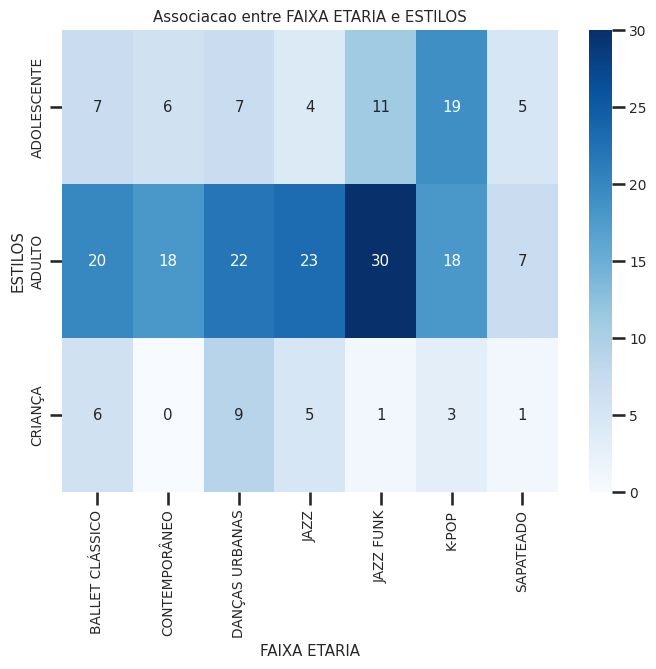

In [74]:
# Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criar a heatmap
sns.heatmap(contingency_table1, annot=True, cmap='Blues', ax=ax)

# Adicionar título e rótulos
ax.set_title('Associacao entre FAIXA ETARIA e ESTILOS')
ax.set_xlabel('FAIXA ETARIA')
ax.set_ylabel('ESTILOS')

# Mostrar a figura
plt.show()



In [75]:
# Criar a tabela de contingência com DIFERENÇA DE DIAS e ESTILOS
contingency_table2 = pd.crosstab(pd.cut(df_completo['DIFERENCA_DIAS'], bins=[0, 7, 14, 30, 60], labels=['0-6 dias', '7-13 dias', '14-29 dias', '30+ dias']), df_completo['ESTILOS'])